In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../3OEC_current_flow.csv')

df["O2_avg"] = df[["O2_S1", "O2_S2", "O2_S3"]].mean(axis=1)

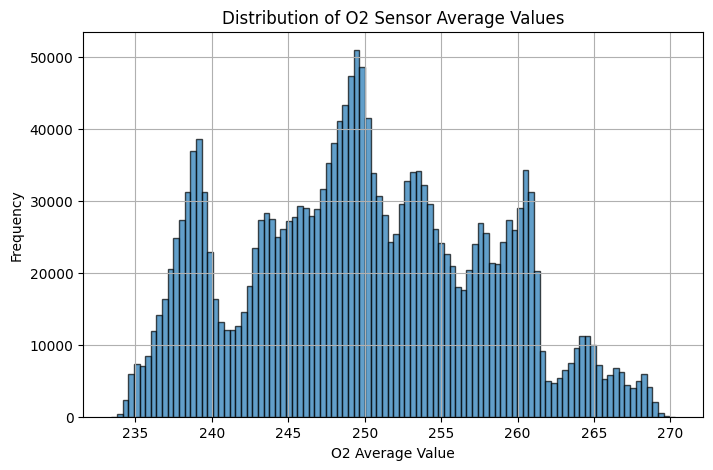

In [3]:
# Plot the distribution
plt.figure(figsize=(8, 5))
plt.hist(df["O2_avg"], bins=100, edgecolor="black", alpha=0.7)
plt.xlabel("O2 Average Value")
plt.ylabel("Frequency")
plt.title("Distribution of O2 Sensor Average Values")
plt.grid(True)

# Show the plot
plt.show()

### Let's try to fit a Generalized Extreme Value distribution

In [4]:
from scipy.stats import genextreme

In [5]:
shape, loc, scale = genextreme.fit(df["O2_avg"])

In [6]:
import numpy as np

In [7]:
x = np.linspace(df["O2_avg"].min(), df["O2_avg"].max(), 100)
pdf = genextreme.pdf(x, shape, loc=loc, scale=scale)

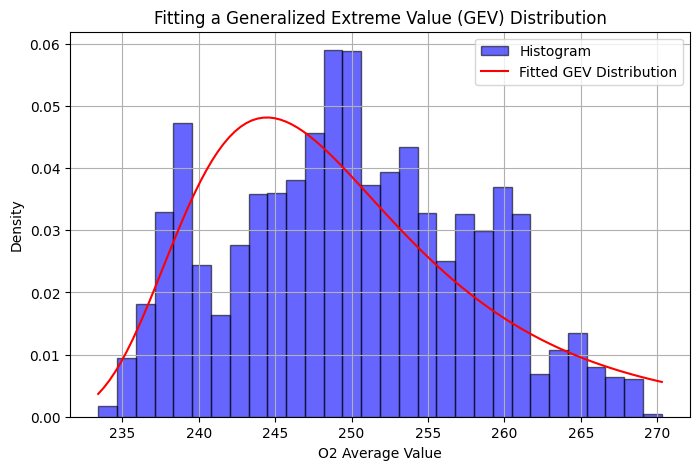

GEV Shape Parameter: -0.1142
GEV Location Parameter: 245.2865
GEV Scale Parameter: 7.6851


In [8]:
# Plot histogram and fitted GEV distribution
plt.figure(figsize=(8, 5))
plt.hist(df["O2_avg"], bins=30, density=True, alpha=0.6, color='blue', edgecolor='black', label="Histogram")
plt.plot(x, pdf, 'r-', label="Fitted GEV Distribution")
plt.xlabel("O2 Average Value")
plt.ylabel("Density")
plt.title("Fitting a Generalized Extreme Value (GEV) Distribution")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

# Print estimated parameters
print(f"GEV Shape Parameter: {shape:.4f}")
print(f"GEV Location Parameter: {loc:.4f}")
print(f"GEV Scale Parameter: {scale:.4f}")

In [9]:
df.head()

,deployment,t,t_increase,Vx,Vy,Vz,P,O2_S1,O2_S2,O2_S3,O2_avg
0,3oec_2017_7_11_12,38.00001,0.000,-4.034,-8.106,-0.114,83.4,245.360132,243.179755,242.755714,243.765200
1,3oec_2017_7_11_12,38.00005,0.125,-4.992,-7.523,-0.010,83.3,245.546132,243.808755,243.700714,244.351867
2,3oec_2017_7_11_12,38.00008,0.250,-5.557,-7.184,-0.311,83.2,244.547133,248.115755,243.859714,245.507534
3,3oec_2017_7_11_12,38.00012,0.375,-6.042,-6.884,-0.580,83.3,244.394133,243.304755,243.767714,243.822200
4,3oec_2017_7_11_12,38.00015,0.500,-5.016,-6.165,-0.421,83.3,244.639132,241.733755,243.862714,243.411867


In [10]:
from datetime import datetime, timedelta

start_time_11 = datetime(2017, 7, 11, 14, 0, 0)
end_time_11 = datetime(2017, 7, 12, 8, 0, 0)

start_time_13 = datetime(2017, 7, 13, 11, 0, 0)
end_time_13 = datetime(2017, 7, 14, 6, 0, 0)

start_time_15 = datetime(2017, 7, 15, 10, 0, 0)
end_time_15 = datetime(2017, 7, 16, 6, 0, 0)

start_time_16 = datetime(2017, 7, 16, 16, 0, 0)
end_time_16 = datetime(2017, 7, 17, 6, 0, 0)

deployments = {
    "3oec_2017_7_11_12": {"start": start_time_11, "end": end_time_11},
    "3oec_2017_7_13_14": {"start": start_time_13, "end": end_time_13},
    "3oec_2017_7_15_16": {"start": start_time_15, "end": end_time_15},
    "3oec_2017_7_16_17": {"start": start_time_16, "end": end_time_16}
}

date_ranges = []

for deployment_name, deployment_info in deployments.items():
    start_time = deployment_info["start"]
    end_time = deployment_info["end"]
    if deployment_name == "3oec_2017_7_13_14":
        start_time -= timedelta(seconds=0.125)
    print(start_time)

    # Calculate total seconds and number of measurements
    total_seconds = (end_time - start_time).total_seconds() + 0.125
    num_measurements = int(total_seconds * 8)

    # Create DatetimeIndex for the deployment
    date_range = pd.date_range(start=start_time, periods=num_measurements, freq=f'{1000/8}ms')
    print(date_range[0], date_range[-1])
    print(len(date_range))
    date_ranges.append(pd.Series(date_range))

# Concatenate all DatetimeIndexes
complete_index = pd.concat(date_ranges)

# Set the complete index to your DataFrame
df.index = complete_index

2017-07-11 14:00:00
2017-07-11 14:00:00 2017-07-12 08:00:00
518401
2017-07-13 10:59:59.875000
2017-07-13 10:59:59.875000 2017-07-14 06:00:00
547202
2017-07-15 10:00:00
2017-07-15 10:00:00 2017-07-16 06:00:00
576001
2017-07-16 16:00:00
2017-07-16 16:00:00 2017-07-17 06:00:00
403201


In [11]:
o2_avg = df['O2_avg']
o2_avg = o2_avg.resample('5min').mean()

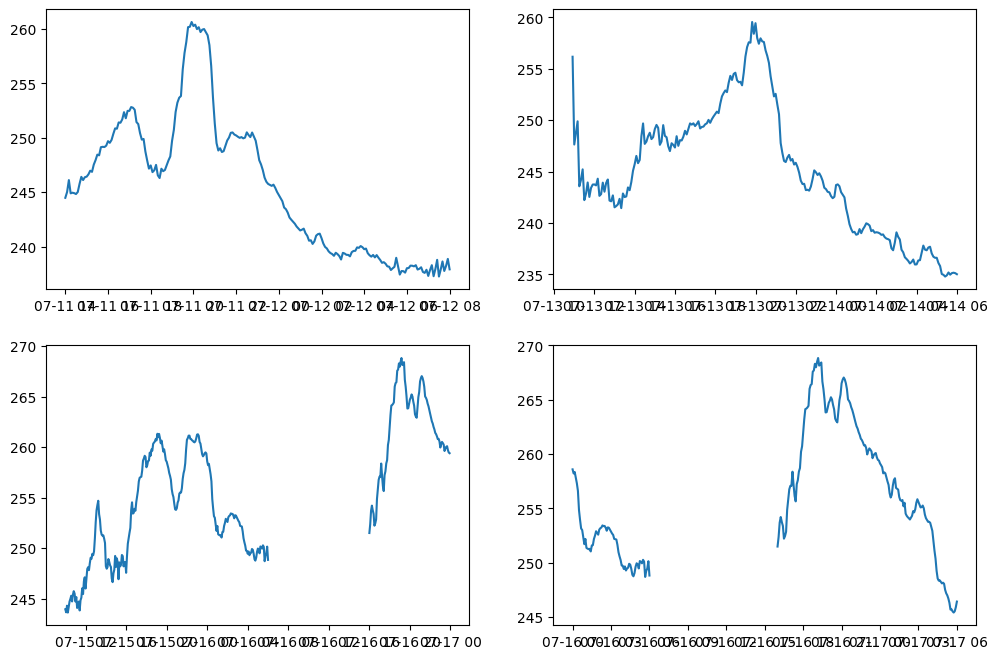

In [12]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes[0,0].plot(o2_avg["2017-07-11":"2017-07-12"])
axes[0,1].plot(o2_avg["2017-07-13":"2017-07-14"])
axes[1,0].plot(o2_avg["2017-07-15":"2017-07-16"])
axes[1,1].plot(o2_avg["2017-07-16":"2017-07-17"])
plt.show()

<AxesSubplot:>

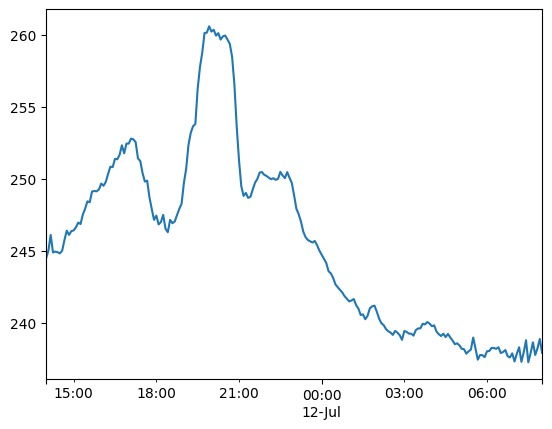

In [13]:
o2_avg["2017-07-11":"2017-07-12 08:00:00"].plot()

In [14]:
first_piece = o2_avg["2017-07-11":"2017-07-12 06:00:00"]
second_piece = o2_avg["2017-07-13 12:00:00":"2017-07-14 06:00:00"]
third_piece = o2_avg["2017-07-15 12:00:00":"2017-07-16 6:00:00"]
fourth_piece = o2_avg["2017-07-16 16:00:00":"2017-07-17"]

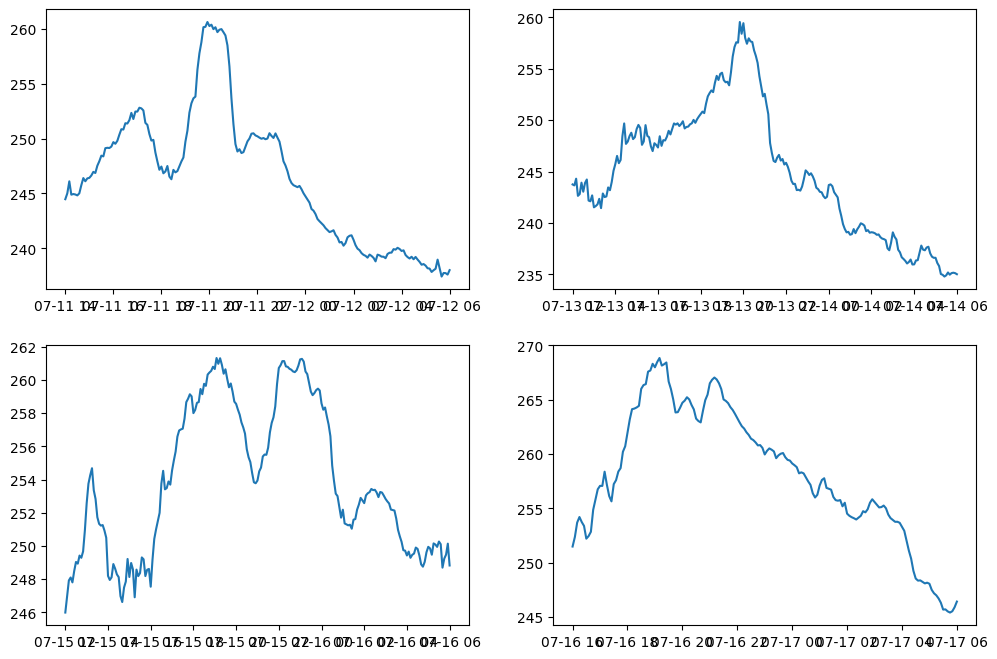

In [15]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes[0,0].plot(first_piece)
axes[0,1].plot(second_piece)
axes[1,0].plot(third_piece)
axes[1,1].plot(fourth_piece)
plt.show()

In [16]:
len(first_piece)

193

In [17]:
from scipy.fftpack import fft, fftfreq

In [18]:
time = first_piece.index
oxygen = first_piece.values

In [19]:
time_seconds = (time - time[0]).total_seconds()

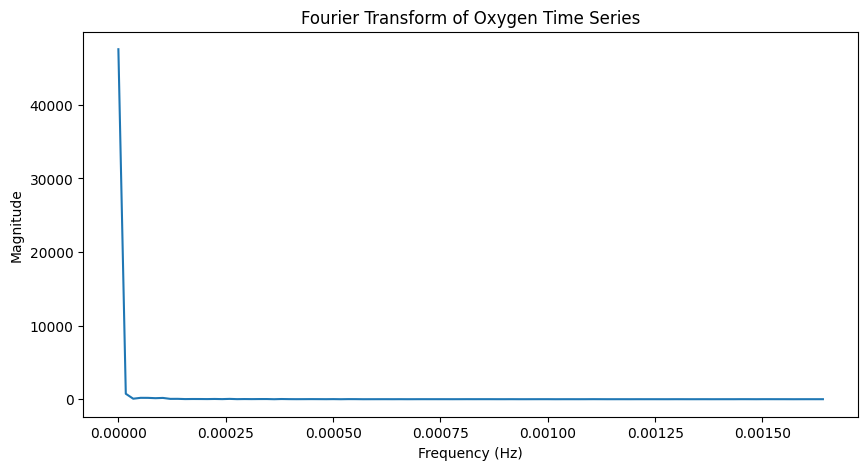

In [20]:
N = len(oxygen)  # Number of samples
T = (time_seconds[1] - time_seconds[0])  # Sampling interval in seconds
freqs = fftfreq(N, d=T)  # Frequency components
fft_values = fft(oxygen)  # Perform FFT

# Plot Frequency Spectrum (only positive frequencies)
plt.figure(figsize=(10, 5))
plt.plot(freqs[:N//2], np.abs(fft_values[:N//2]))  # Only positive frequencies
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.title("Fourier Transform of Oxygen Time Series")
plt.show()

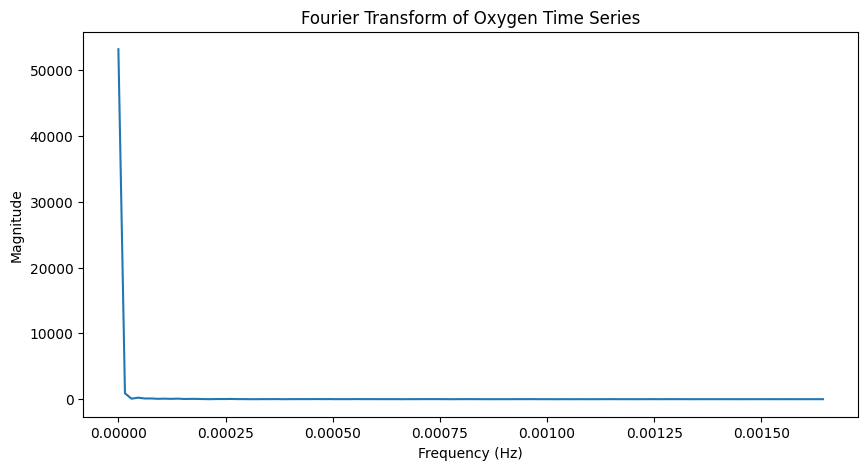

In [21]:
time = second_piece.index
oxygen = second_piece.values
time_seconds = (time - time[0]).total_seconds()
N = len(oxygen)  # Number of samples
T = (time_seconds[1] - time_seconds[0])  # Sampling interval in seconds
freqs = fftfreq(N, d=T)  # Frequency components
fft_values = fft(oxygen)  # Perform FFT

# Plot Frequency Spectrum (only positive frequencies)
plt.figure(figsize=(10, 5))
plt.plot(freqs[:N//2], np.abs(fft_values[:N//2]))  # Only positive frequencies
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.title("Fourier Transform of Oxygen Time Series")
plt.show()

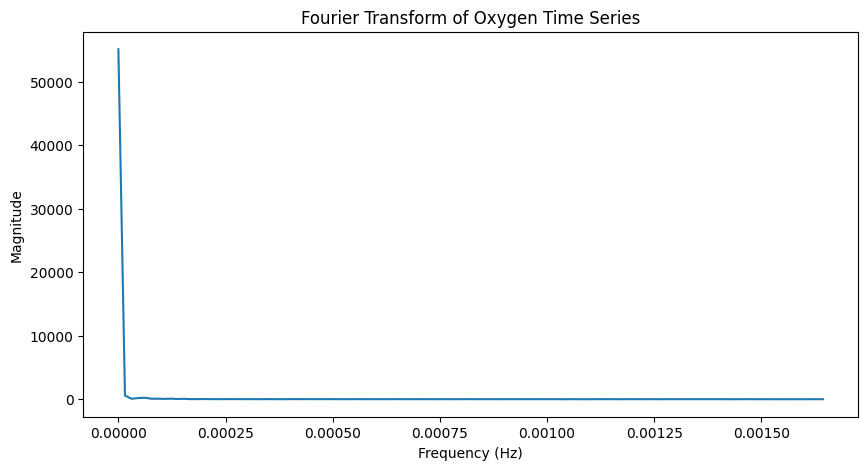

In [22]:
time = third_piece.index
oxygen = third_piece.values
time_seconds = (time - time[0]).total_seconds()
N = len(oxygen)  # Number of samples
T = (time_seconds[1] - time_seconds[0])  # Sampling interval in seconds
freqs = fftfreq(N, d=T)  # Frequency components
fft_values = fft(oxygen)  # Perform FFT

# Plot Frequency Spectrum (only positive frequencies)
plt.figure(figsize=(10, 5))
plt.plot(freqs[:N//2], np.abs(fft_values[:N//2]))  # Only positive frequencies
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.title("Fourier Transform of Oxygen Time Series")
plt.show()

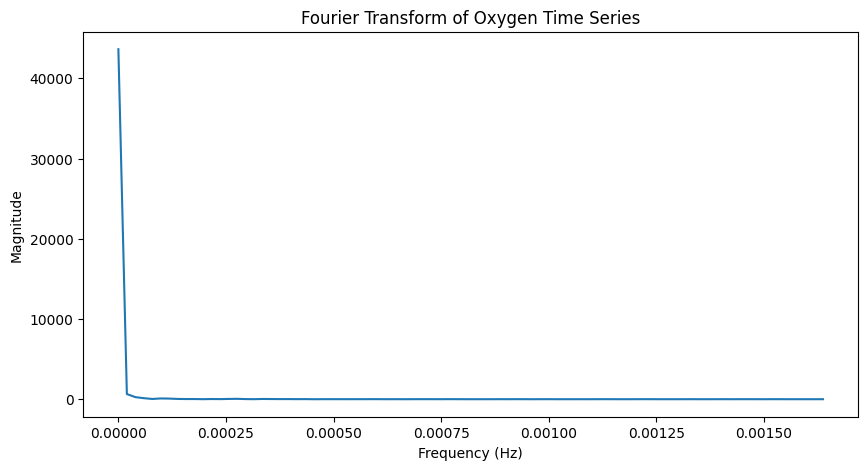

In [23]:
time = fourth_piece.index
oxygen = fourth_piece.values
time_seconds = (time - time[0]).total_seconds()
N = len(oxygen)  # Number of samples
T = (time_seconds[1] - time_seconds[0])  # Sampling interval in seconds
freqs = fftfreq(N, d=T)  # Frequency components
fft_values = fft(oxygen)  # Perform FFT

# Plot Frequency Spectrum (only positive frequencies)
plt.figure(figsize=(10, 5))
plt.plot(freqs[:N//2], np.abs(fft_values[:N//2]))  # Only positive frequencies
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.title("Fourier Transform of Oxygen Time Series")
plt.show()